In [1]:
# Activate the following in colab : 
!pip3 install netCDF4
!apt install proj-bin libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

import pandas as pd 
import math
from datetime import datetime,date
import datetime
import numpy as np
import xarray as xr

/home/maltem/.local/lib/python3.6/site-packages/pandas/compat/_optional.py:124: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)


In [3]:
era5 = pd.read_csv("https://raw.githubusercontent.com/maltemuellerm/MOSAiC/master/data/v01/ERA5_MOSAiC_2019-2020.csv")
wpol = pd.read_csv("https://raw.githubusercontent.com/maltemuellerm/MOSAiC/master/data/v01/PolarsternWetterStation_MOSAiC_2019-2020.csv")
modis= pd.read_csv("https://raw.githubusercontent.com/maltemuellerm/MOSAiC/master/data/v01/MODIS_MOSAiC_2019.csv")
topaz= pd.read_csv("https://raw.githubusercontent.com/maltemuellerm/MOSAiC/master/data/v01/TOPAZ_MOSAiC_2019-2020.csv")                 

In [4]:
mosasfs30met = xr.open_dataset("https://thredds.met.no/thredds/dodsC/metusers/maltem/MOSAiC/mosasfs30met.level2.10min.all.nc")

In [5]:
# Fixing the different time axis representations:
wpoltime = []
for i in range(np.max(np.shape(era5))):
    wpoltime.append(datetime.datetime.strptime(era5.datetime[i], '%Y/%m/%d %H:%M:%S'))
modistime = []
for i in range(np.max(np.shape(modis))):
    modistime.append(datetime.datetime.strptime(modis.datetime[i], '%Y/%m/%d %H:%M:%S')) 

In [6]:
mosasfs30met

<xarray.Dataset>
Dimensions:                  (time: 45792)
Coordinates:
  * time                     (time) datetime64[ns] 2019-10-06 ... 2020-10-01T...
Data variables:
    lat                      (time) float64 ...
    lon                      (time) float64 ...
    heading                  (time) float64 ...
    zenith_true              (time) float64 ...
    zenith_apparent          (time) float64 ...
    azimuth                  (time) float64 ...
    ship_distance            (time) float64 ...
    ship_bearing             (time) float64 ...
    sr50_dist                (time) float64 ...
    snow_depth               (time) float64 ...
    atmos_pressure           (time) float64 ...
    temp                     (time) float64 ...
    rh                       (time) float64 ...
    dew_point                (time) float64 ...
    mixing_ratio             (time) float64 ...
    vapor_pressure           (time) float64 ...
    rhi                      (time) float64 ...
    brightness_temp_surface  (time) float64 ...
    skin_temp_surface        (time) float64 ...
    subsurface_heat_flux_A   (time) float64 ...
    subsurface_heat_flux_B   (time) float64 ...
    wspd_vec_mean            (time) float64 ...
    wdir_vec_mean            (time) float64 ...
    acoustic_temp            (time) float64 ...
    h2o_licor                (time) float64 ...
    co2_licor                (time) float64 ...
    down_long_hemisp         (time) float64 ...
    down_short_hemisp        (time) float64 ...
    up_long_hemisp           (time) float64 ...
    up_short_hemisp          (time) float64 ...
    net_radiation            (time) float64 ...
Attributes:
    CDI:                             Climate Data Interface version ?? (http:...
    Conventions:                     CF-1.6
    history:                         Tue Jan 26 21:51:44 2021: cdo mergetime ...
    source:                          Observations made during the MOSAiC drif...
    institution:                     CIRES, University of Colorado and NOAA P...
    date_created:                    Fri Jan 15 20:34:51 2021
    title:                           MOSAiC flux group data product: 
    contact:                         Matthew Shupe, University of Colorado, m...
    file_creator:                    Michael R. Gallagher; Christopher J. Cox
    creator_email:                   michael.r.gallagher@noaa.gov; christophe...
    project:                         MOSAiC, PS-122: Thermodynamic and Dynami...
    Funding:                         Funding sources: National Science Founda...
    system:                          asfs30
    keywords:                        Polar, Arctic, Supersite, Observations, ...
    conventions:                     cf convention variable naming as attribu...
    version:                         1.5, 1/8/2020
    quality_control:                 Significant quality control in place for...
    CDO:                             Climate Data Operators version 1.9.3 (ht...
    DODS_EXTRA.Unlimited_Dimension:  time

Text(0.5, 1.0, 'Air temperature')

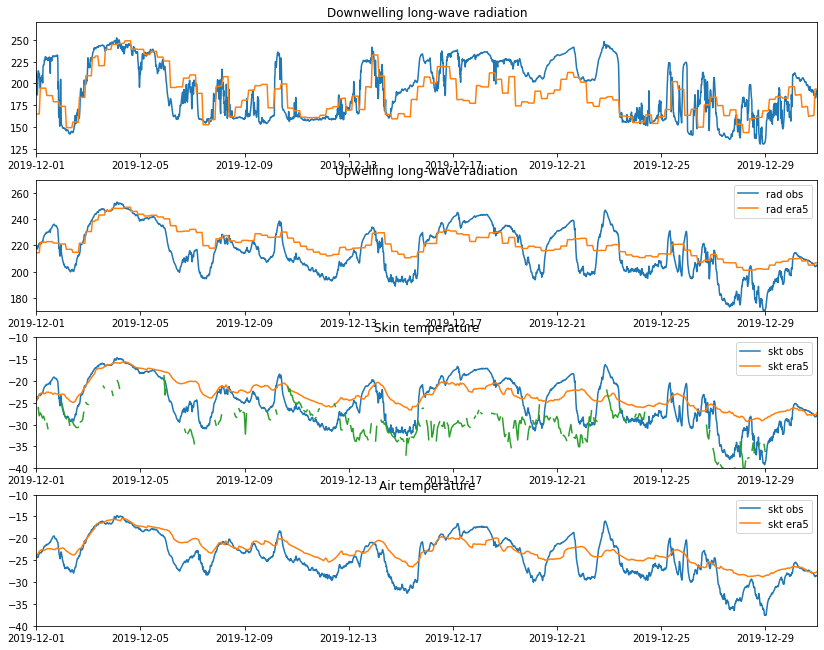

In [7]:
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

tstart=pd.Timestamp('2019-12-1')
tend=pd.Timestamp('2019-12-31')

fig = plt.figure(figsize=(14,14))

ax1 = plt.subplot(511)
ax1.plot(mosasfs30met.time, mosasfs30met.down_long_hemisp, '-')
ax1.plot(wpoltime,era5.strd/3600,'-')
ax1.set_xlim(tstart,tend)
ax1.set_ylim(120,270)
plt.title('Downwelling long-wave radiation')

ax1 = plt.subplot(512)
ax1.plot(mosasfs30met.time, mosasfs30met.up_long_hemisp, '-')
ax1.plot(wpoltime,(-era5.stru+era5.strd)/3600,'-')
ax1.set_xlim(tstart,tend)
ax1.set_ylim(170,270)
ax1.legend(['rad obs','rad era5'])
plt.title('Upwelling long-wave radiation')

ax1 = plt.subplot(513)
ax1.plot(mosasfs30met.time, mosasfs30met.skin_temp_surface, '-')
ax1.plot(wpoltime,era5.skt-273.15,'-')
ax1.plot(modistime,modis.ist-273.15)
ax1.set_xlim(tstart,tend)
ax1.set_ylim(-40,-10)
ax1.legend(['skt obs','skt era5'])
plt.title('Skin temperature')

ax1 = plt.subplot(514)
ax1.plot(mosasfs30met.time, mosasfs30met.temp, '-')
ax1.plot(wpoltime,era5.t2m-273.15,'-')
ax1.set_xlim(tstart,tend)
ax1.set_ylim(-40,-10)
ax1.legend(['skt obs','skt era5'])
plt.title('Air temperature')


Text(0.5, 1.0, 'Snow Depth')

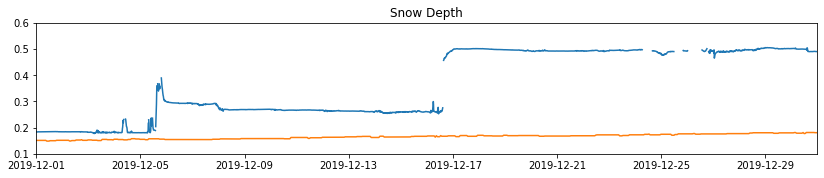

In [8]:
tstart=pd.Timestamp('2019-12-1')
tend=pd.Timestamp('2019-12-31')

fig = plt.figure(figsize=(14,14))

ax1 = plt.subplot(511)
ax1.plot(mosasfs30met.time, mosasfs30met.snow_depth/100, '-')
ax1.plot(wpoltime,topaz.hsnow,'-')
ax1.set_xlim(tstart,tend)
ax1.set_ylim(0.1,0.6)
plt.title('Snow Depth')
